## BUSINESS UNDERSTANDING

From a business / aviation safety perspective, stakeholders want to know:

- Are accidents increasing or decreasing over time?

- How severe are most accidents?

- How often do accidents involve fatalities?

- Which operators appear most frequently in accident reports?

These insights can help:

- Airlines improve safety procedures

- Regulators focus inspections

- Insurance companies assess risk

# OBJECTIVES
- Understand accident trends over time

- Identify damage severity patterns

- Examine fatal vs non-fatal accidents

- Identify operators with higher accident counts

In [24]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# loading the dataset
df = pd.read_csv('flight.csv')
df

,Unnamed: 0,acc.date,type,reg,operator,fat,location,dmg
0,0,3 Jan 2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1,1,4 Jan 2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,2,5 Jan 2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,3,8 Jan 2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,4,12 Jan 2022,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o
...,...,...,...,...,...,...,...,...
2495,1245,20 Dec 2018,Cessna 560 Citation V,N188CW,Chen Aircrafts LLC,4,"2 km NE of Atlanta-Fulton County Airport, GA (...",w/o
2496,1246,22 Dec 2018,PZL-Mielec M28 Skytruck,GNB-96107,Guardia Nacional Bolivariana de Venezuela - GNBV,0,Kamarata Airport (KTV),sub
2497,1247,24 Dec 2018,Antonov An-26B,9T-TAB,Air Force of the Democratic Republic of the Congo,0,Beni Airport (BNC),w/o
2498,1248,31 Dec 2018,Boeing 757-2B7 (WL),N938UW,American Airlines,0,"Charlotte-Douglas International Airport, NC (C...",sub


# DATA UNDERSTANDING

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2500 non-null   int64 
 1   acc.date    2500 non-null   object
 2   type        2500 non-null   object
 3   reg         2408 non-null   object
 4   operator    2486 non-null   object
 5   fat         2488 non-null   object
 6   location    2500 non-null   object
 7   dmg         2500 non-null   object
dtypes: int64(1), object(7)
memory usage: 156.4+ KB


*The dataset contains 2,500 flight accident records with the following columns:*

*'Unnamed', 'acc.date', 'type', 'reg', 'operator', 'fat', 'location', 'dmg'.*

*Most columns are categorical.*

In [28]:
df.describe()

,Unnamed: 0
count,2500.000000
mean,624.500000
std,360.915993
min,0.000000
25%,312.000000
50%,624.500000
75%,937.000000
max,1249.000000


In [29]:
# Checking for missing values
df.isna().sum()

Unnamed: 0     0
acc.date       0
type           0
reg           92
operator      14
fat           12
location       0
dmg            0
dtype: int64

*we have 92 missing values in 'reg column', 14 in 'operator column' and 12 in 'fat column'. The rest have no missing values.*

In [31]:
# Checking for duplicates
df.duplicated().sum()

1250

# DATA PREPERATION AND CLEANING

*This step ensures the data is usable and reliable.*

In [32]:
# Remove unnecessary index column 'Unnamed: 0'
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
df

,acc.date,type,reg,operator,fat,location,dmg
0,3 Jan 2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1,4 Jan 2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,5 Jan 2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,8 Jan 2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,12 Jan 2022,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o
...,...,...,...,...,...,...,...
2495,20 Dec 2018,Cessna 560 Citation V,N188CW,Chen Aircrafts LLC,4,"2 km NE of Atlanta-Fulton County Airport, GA (...",w/o
2496,22 Dec 2018,PZL-Mielec M28 Skytruck,GNB-96107,Guardia Nacional Bolivariana de Venezuela - GNBV,0,Kamarata Airport (KTV),sub
2497,24 Dec 2018,Antonov An-26B,9T-TAB,Air Force of the Democratic Republic of the Congo,0,Beni Airport (BNC),w/o
2498,31 Dec 2018,Boeing 757-2B7 (WL),N938UW,American Airlines,0,"Charlotte-Douglas International Airport, NC (C...",sub


In [33]:
# Convert accident date to datetime
df['acc.date'] = pd.to_datetime(df['acc.date'], errors='coerce')
df

,acc.date,type,reg,operator,fat,location,dmg
0,2022-01-03,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1,2022-01-04,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,2022-01-05,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,2022-01-08,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,2022-01-12,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o
...,...,...,...,...,...,...,...
2495,2018-12-20,Cessna 560 Citation V,N188CW,Chen Aircrafts LLC,4,"2 km NE of Atlanta-Fulton County Airport, GA (...",w/o
2496,2018-12-22,PZL-Mielec M28 Skytruck,GNB-96107,Guardia Nacional Bolivariana de Venezuela - GNBV,0,Kamarata Airport (KTV),sub
2497,2018-12-24,Antonov An-26B,9T-TAB,Air Force of the Democratic Republic of the Congo,0,Beni Airport (BNC),w/o
2498,2018-12-31,Boeing 757-2B7 (WL),N938UW,American Airlines,0,"Charlotte-Douglas International Airport, NC (C...",sub


- Handling of Missing values

*Since this is a sensitive data, there are various ways to handle the missing data/values. So i've decided to handle each of them by the column they are in.*

In [34]:
df.isna().sum()

acc.date     6
type         0
reg         92
operator    14
fat         12
location     0
dmg          0
dtype: int64

First, the Accident Date (acc.date) column, we drop the missing values. without date record can't be used for trend or time based analysis.

In [35]:
# dropping missing values in acc.date column
df = df.dropna(subset=['acc.date'])

Secondly, the Reg and Operator columns, to be filled with 'unknown'. dropping them would lose valuable incidents.

In [37]:
# Replacing missing values with 'unknown'
categorical_cols = ['reg', 'operator']

for col in categorical_cols:
    df.loc[:, col] = df[col].fillna('Unknown')

C:\Users\Administrator\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Next the Fatalities(fat) column best approach is median imputation since median is robust and realistic, and may contain outliers.

In [38]:
#using the .loc method and median to fill the missing values in the fatalities column
df.loc[:, 'fat'] = pd.to_numeric(df['fat'], errors='coerce')
df.loc[:, 'fat'] = df['fat'].fillna(df['fat'].median())

In [39]:
df

,acc.date,type,reg,operator,fat,location,dmg
0,2022-01-03,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0.0,near Venetia Mine Airport,sub
1,2022-01-04,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0.0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,2022-01-05,Boeing 737-4H6,EP-CAP,Caspian Airlines,0.0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,2022-01-08,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0.0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,2022-01-12,Beechcraft 200 Super King Air,Unknown,private,0.0,"Machakilha, Toledo District, Grahem Creek area",w/o
...,...,...,...,...,...,...,...
2494,2018-12-20,Antonov An-26B,9S-AGB,Gomair,7.0,ca 37 km from Kinshasa-N'Djili Airport (FIH),w/o
2495,2018-12-20,Cessna 560 Citation V,N188CW,Chen Aircrafts LLC,4.0,"2 km NE of Atlanta-Fulton County Airport, GA (...",w/o
2496,2018-12-22,PZL-Mielec M28 Skytruck,GNB-96107,Guardia Nacional Bolivariana de Venezuela - GNBV,0.0,Kamarata Airport (KTV),sub
2497,2018-12-24,Antonov An-26B,9T-TAB,Air Force of the Democratic Republic of the Congo,0.0,Beni Airport (BNC),w/o


In [40]:
# Ensure there are no missing values left
df.isna().sum()

acc.date    0
type        0
reg         0
operator    0
fat         0
location    0
dmg         0
dtype: int64

- Handling of duplicates

In [41]:
# finding the number of duplicates
df.duplicated().sum()

1247

*There are 1247 duplicated values in this data set, which may be because this data may be extracted from many sources and combined to one.*

*Here we shall keep the most complete record (partial duplicates) and drop the rest*

In [ ]:
# Adding a column for missing values per row
df.loc[:, 'missing_count'] = df.isna().sum(axis=1)

# Sort by the missing_count so the most complete rows are first
df = df.sort_values('missing_count')

# Drop duplicates, keeping the most complete row
df = df.drop_duplicates(
    subset=['acc.date', 'type', 'location'],
    keep='first'
)

# Remove the helper column
df = df.drop(columns='missing_count')

In [45]:
# confirming that we have no duplicated values in the dataset
df.duplicated().sum()

0

# DATA ANALYSIS- EXPLORATORY DATA ANALYSIS(EDA)

- Finding out the number of Accidents per year and then visualizing it using a line chart.

In [46]:
# grouping the accidents according to the year they occured
df['year'] = df['acc.date'].dt.year
accidents_per_year = (
    df.groupby('year')
      .size()
      .reset_index(name='accident_count'))

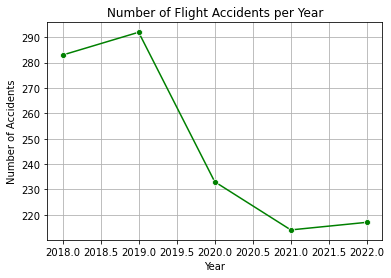

In [47]:
# creating a line plot for visualization
sns.lineplot(
    data=accidents_per_year,
    x='year',
    y='accident_count',
    marker='o',
    color='green'
)

plt.title('Number of Flight Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

*The line chart shows that the number of flight accidents peaked around 2018–2019 and declined afterward. This trend may be associated with reduced global air traffic during the COVID-19 pandemic.*

- EDA: Damage Severity Distribution. Here we look at accidents that resulted in substantial damage,write-offs, Minor and no-damage

In [48]:
df['dmg'].value_counts()

sub    658
w/o    349
non    169
min     47
unk     15
mis      1
Name: dmg, dtype: int64

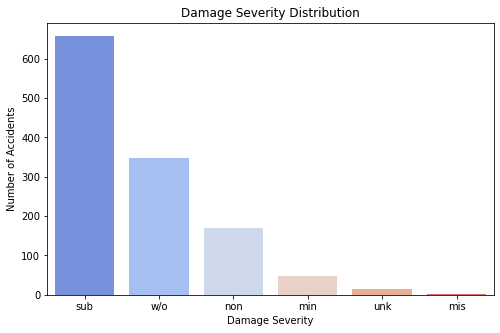

In [49]:
# bar graph visualization for damage severity distribution
plt.figure(figsize=(8, 5))

sns.countplot(
    data=df,
    x='dmg',
    order=df['dmg'].value_counts().index, palette= 'coolwarm'
)

plt.title('Damage Severity Distribution')
plt.xlabel('Damage Severity')
plt.ylabel('Number of Accidents')
plt.show()

*The damage severity distribution shows that most recorded accidents resulted in substantial damage, followed by write-offs. Minor and no-damage cases are relatively rare, indicating that reported accidents often involve significant aircraft damage.*

- EDA: Fatal vs Non-Fatal Accidents using a pie chart visualization

In [50]:
df['fatal_accident'] = df['fat'] > 0

In [51]:
# getting to identify number of fatal accidents vs non-fatal accidents
fatal_counts = df['fatal_accident'].value_counts()
fatal_counts

False    1049
True      190
Name: fatal_accident, dtype: int64

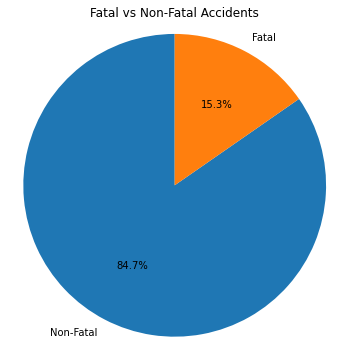

In [52]:
# using a pie chart for visualization to show the percentage of distribution
plt.figure(figsize=(6, 6))

plt.pie(
    fatal_counts,
    labels=['Non-Fatal', 'Fatal'],
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Fatal vs Non-Fatal Accidents')
plt.axis('equal')  # Makes pie a circle
plt.show()

*The visualization shows that the majority of flight accidents are non-fatal. Fatal accidents represent a smaller proportion of total incidents, indicating that while accidents occur, loss of life is relatively infrequent.*

- EDA: Top 10 Operators by Accident Count

In [53]:
# Get top 10 operators by accident count
top_operators = (
    df['operator']
    .value_counts()
    .head(10)
    .reset_index()
)

top_operators.columns = ['operator', 'accident_count']

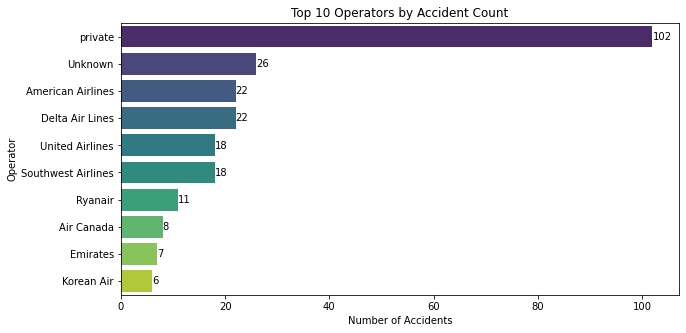

In [54]:
# using a bar graph for visualization
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=top_operators, palette='viridis', 
    x='accident_count',
    y='operator'
)

for p in ax.patches:
    ax.annotate(
        int(p.get_width()),
        (p.get_width(), p.get_y() + p.get_height() / 2),
        va='center'
    )

plt.title('Top 10 Operators by Accident Count')
plt.xlabel('Number of Accidents')
plt.ylabel('Operator')
plt.show()

*The visualization shows that private operators account for the highest number of recorded accidents. This may be due to a large number of small private flights rather than poorer safety performance. Therefore, accident counts should be normalized by flight volume for fair comparison.*

- EDA Most Frequent Accident Locations

In [55]:
# top ten location that are accident prone
top_locations = df['location'].value_counts().head(10).reset_index()
top_locations.columns = ['location', 'count']

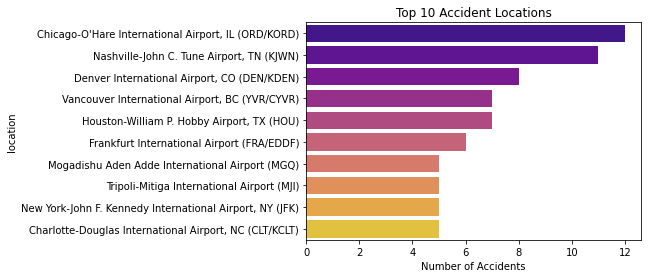

In [56]:
sns.barplot(data=top_locations, x='count', y='location', palette = 'plasma')
plt.title('Top 10 Accident Locations')
plt.xlabel('Number of Accidents')
plt.show()

- EDA Distribution of Fatalities per Accident

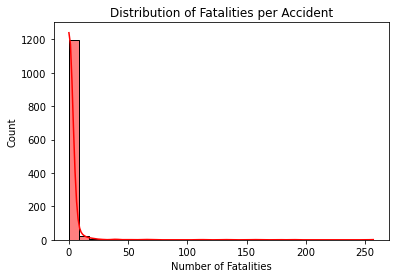

In [57]:
# Using a histogram to show the distribution of fatalities per accident
sns.histplot(df['fat'], bins=30, kde=True, color = 'red')
plt.title('Distribution of Fatalities per Accident')
plt.xlabel('Number of Fatalities')
plt.show()

*Here we can see The distribution is heavily right-skewed Most accidents occur at 0 fatalities*

*Most flight accidents do not result in loss of life, but when fatalities occur, they can be severe.*

- FINDING OUT THE CORRELATION BETWEEN DAMAGE TYPE AND FATALITIES

In [58]:
dmg_map = {'non': 0, 'min': 1, 'sub': 2, 'w/o': 3}
df['dmg_encoded'] = df['dmg'].map(dmg_map)

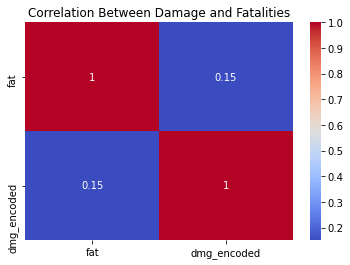

In [59]:
# a heatmap is the best way to visualize correlation
sns.heatmap(
    df[['fat', 'dmg_encoded']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Between Damage and Fatalities')
plt.show()

*Higher damage severity correlates with fatalities. The more the damage to an aircraft the more its likely to have fatalities*

- Finding out the Number of Accidents by Month

In [61]:
# Create a month column
df['month'] = df['acc.date'].dt.month

# Aggregate accidents per month
accidents_per_month = (
    df.groupby('month')
      .size()
      .reset_index(name='accident_count')
)

print(accidents_per_month)

    month  accident_count
0       1              92
1       2             104
2       3             112
3       4              80
4       5              98
5       6             105
6       7             128
7       8             116
8       9             112
9      10              95
10     11              89
11     12             108


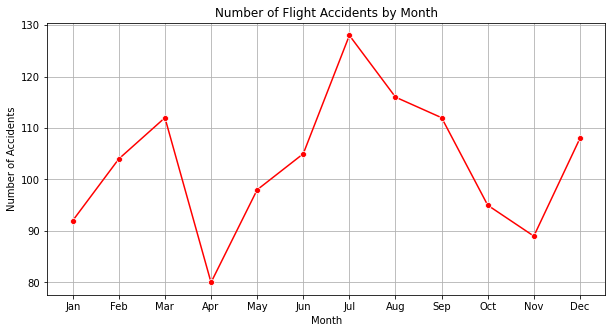

In [62]:
# Creating a line plot for better visualization as its good for time-series EDA
plt.figure(figsize=(10, 5))

sns.lineplot(
    data=accidents_per_month,
    x='month',
    y='accident_count',
    marker='o',
    color='red'
)

plt.title('Number of Flight Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(
    ticks=range(1, 13),
    labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
)

plt.grid(True)
plt.show()

*The line chart shows the distribution of flight accidents across months. Variations in accident counts suggest seasonality, possibly influenced by weather conditions, peak travel periods, and operational factors.*

# CONCLUSION 

1. Accident Frequency Has Declined in Recent Years. The yearly trend shows a reduction in accidents, especially after 2019.
2. Most Accidents Are Non-Fatal. The fatal vs non-fatal analysis shows that the majority of accidents do not result in fatalities.
3. Substantial and Write-Off Damage Is Common. Damage severity analysis shows that most reported accidents involve significant aircraft damage.
4. Accident Frequency Varies by Month. Environmental and operational factors influence accident occurrence.
5. Private Operators Appear Frequently in Accident Records. This may be due to Larger number of small private flights.


# RECOMMENDATIONS

1. Seasonal Risk Mitigation. Increase inspections, crew training, and operational caution during high-risk months.
2. Improve Safety Oversight for Private Operators. Strengthen regulations and audits for private and charter operators.
3. Enhance Data Collection to include Weather conditions, Aircraft age. Richer data enables better predictive modeling and policy decisions.

*The analysis indicates that while flight accidents still occur, the majority are non-fatal and accident frequency has declined over time. However, a small number of catastrophic events account for a disproportionate share of fatalities. Seasonal patterns and operator characteristics further influence accident occurrence. These findings suggest that aviation safety efforts should focus not only on reducing accident frequency but also on mitigating the severity of rare high-impact events.*